In [1]:
from mintpy.objects import ionex
tec_file='/home/eedy/data/aux/IONEX/jplg1250.23i'
mins, lat, lon, tec_maps, rms_maps = ionex.read_ionex(tec_file)

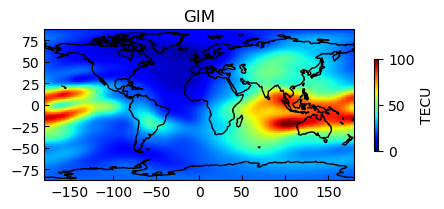

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# 创建地图投影
plt.figure(figsize=(5, 3))
ax = plt.axes(projection=ccrs.PlateCarree())

# 绘制图像
im = ax.imshow(tec_maps[3, :, :], cmap='jet', origin='lower',
               extent=[lon.min(), lon.max(), lat.min(), lat.max()],
               transform=ccrs.PlateCarree(),vmax=100,vmin=0)

# 添加海岸线
ax.add_feature(cfeature.COASTLINE)

# 设置坐标轴刻度向内
ax.tick_params(axis='both', direction='in')


# 设置横纵坐标轴刻度
ax.set_xticks(np.arange(-150, 151, 50))
ax.set_yticks(np.arange(-75, 76, 25))

# 添加颜色条
plt.colorbar(im, ax=ax, label='TECU', shrink=0.4)
plt.title('GIM')

plt.savefig('GIM.png', bbox_inches='tight', transparent=True, dpi=600)
plt.show()